In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import tqdm as tqdm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('train.csv', encoding = 'cp949')
test = pd.read_csv('test.csv',encoding = 'cp949')
submission = pd.read_csv('sample_submission.csv', encoding = 'cp949')

In [3]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [4]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 결측치 확인하기
print('train 결측치', '\n' ,train.isnull().sum())
print('test 결측치', '\n', test.isnull().sum())

train 결측치 
 num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64
test 결측치 
 num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
dtype: int64


- test에 엄청 많은 결측치가 포함되어있다.

In [6]:
# 데이터 타입확인하기
print('train.shape',train.shape)
print('test.shape', test.shape)

train.shape (122400, 10)
test.shape (10080, 9)


## 종속변수 확인해보기

In [7]:
# 전력사용량(kWh)로 표시해주기 너무 불편함으로 target이라고 바꿔주자.
train=train.rename(columns = {'전력사용량(kWh)': 'target'})

test=test.rename(columns = {'기온(°C)':'Temperatures', '풍속(m/s)':'Wind speed',
                              '습도(%)':'Humidity',
                              '강수량(mm, 6시간)':'Precipitation','일조(hr, 3시간)':'sunshine'})

Text(0.5, 1.0, 'boxenplot of target')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


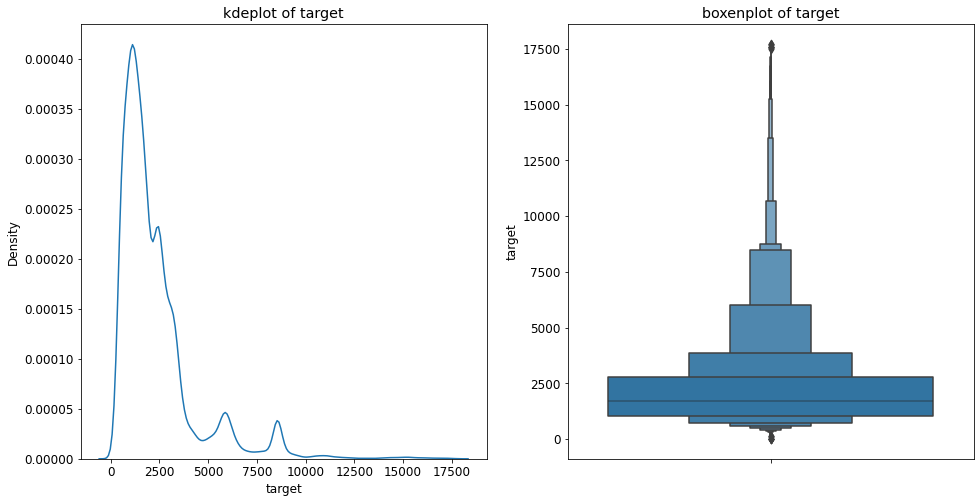

In [8]:
# 정규화가 되어있지 않고 1000~2500까지 많은데이터가 분포되어잇다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.kdeplot(data = train, x = 'target', ax = ax[0])
ax[0].set_title('kdeplot of target')

sns.boxenplot(data = train, y = 'target', ax = ax[1])
ax[1].set_title('boxenplot of target')

- 이상치가 많은것으로 보여진다.

<AxesSubplot:>

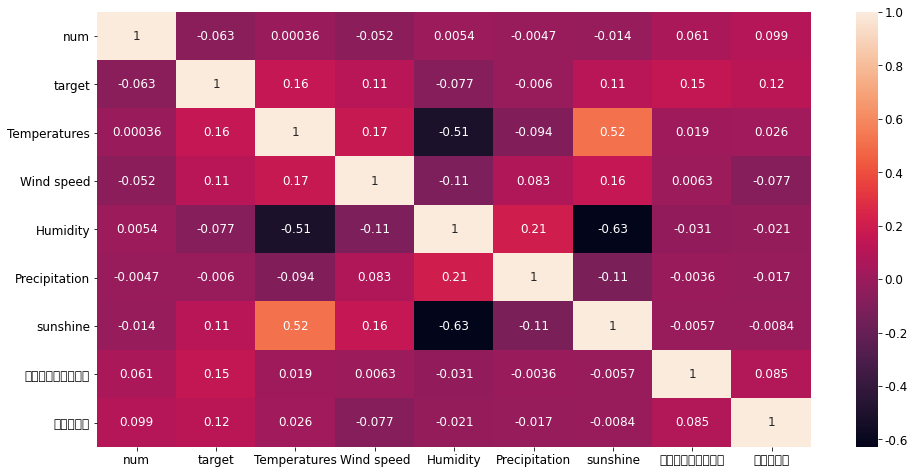

In [9]:
# 변수명이 너무 길기 때문에 변수명을 전부 바꿔준다.
train=train.rename(columns = {'기온(°C)':'Temperatures', '풍속(m/s)':'Wind speed',
                              '습도(%)':'Humidity',
                              '강수량(mm)':'Precipitation','일조(hr)':'sunshine'})

train_corr=train.corr()
plt.figure(figsize = (16,8))
sns.heatmap(train_corr, annot = True)

### test의 결측값이 결측값이 아닌것을 확인했고 우리는 interpolate를 사용하여 채워주자.

In [10]:
# 결측치 채우기
col = ['Temperatures','Wind speed','Humidity','Precipitation','sunshine']
for i in col:
    test[i] = test[i].interpolate()

In [11]:
test

,num,date_time,Temperatures,Wind speed,Humidity,Precipitation,sunshine,비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,NaN,NaN
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,NaN,NaN
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,NaN,NaN
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,NaN,NaN
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,NaN,NaN
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,NaN,NaN
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,NaN,NaN


## num(한 건물을 나타낸다.)

In [12]:
train.num.unique()
# 60개의 건물이 있다는 것을 확인했다.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

<AxesSubplot:xlabel='num', ylabel='target'>

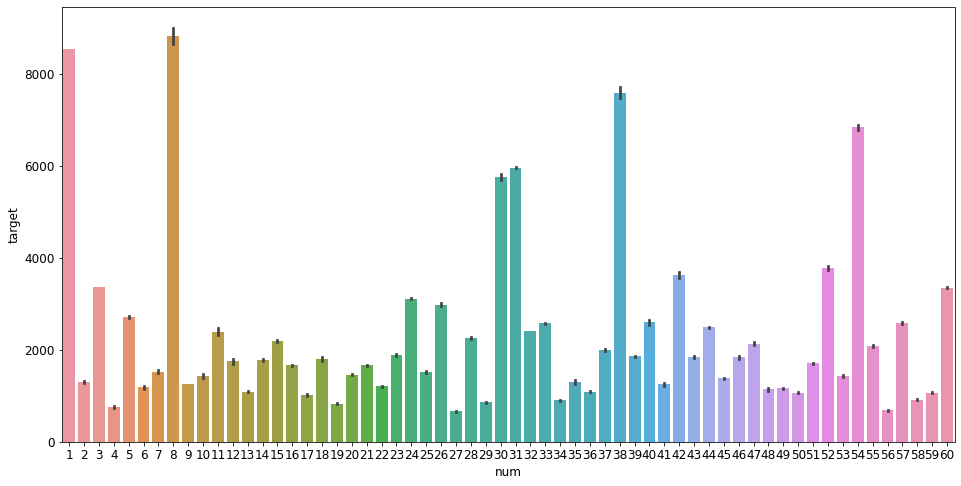

In [13]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'num', y = 'target')

- 각 건물마다 전기 사용량이 제각각 다른 것을 확인했다.

<AxesSubplot:xlabel='target', ylabel='Count'>

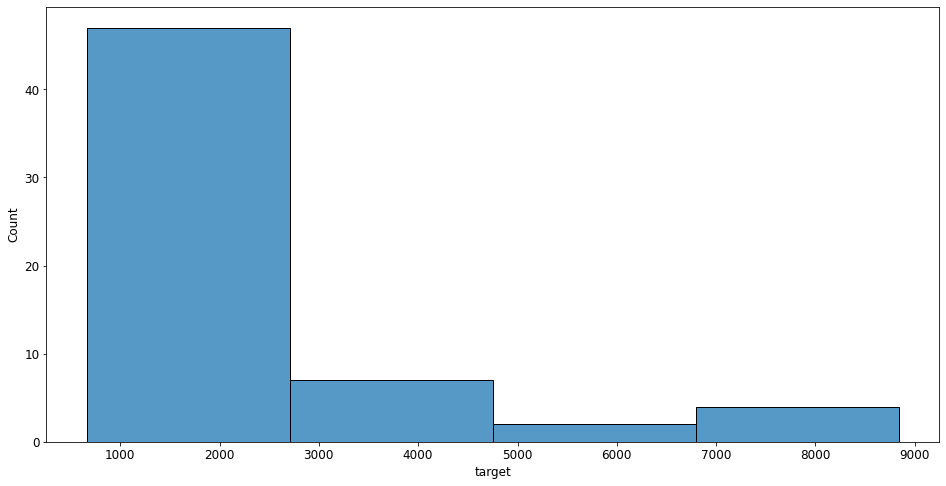

In [14]:
# 4개로 했을 때 가장 두드러지게 나타난다.
sns.histplot(train.groupby('num')['target'].mean(),bins = 4)

In [15]:
mapping=pd.qcut(train.groupby('num')['target'].mean(),4 ,labels = [0,1,2,3])
train['num_target'] = train['num'].map(mapping)
test['num_target'] = test['num'].map(mapping)

<AxesSubplot:xlabel='num_target', ylabel='target'>

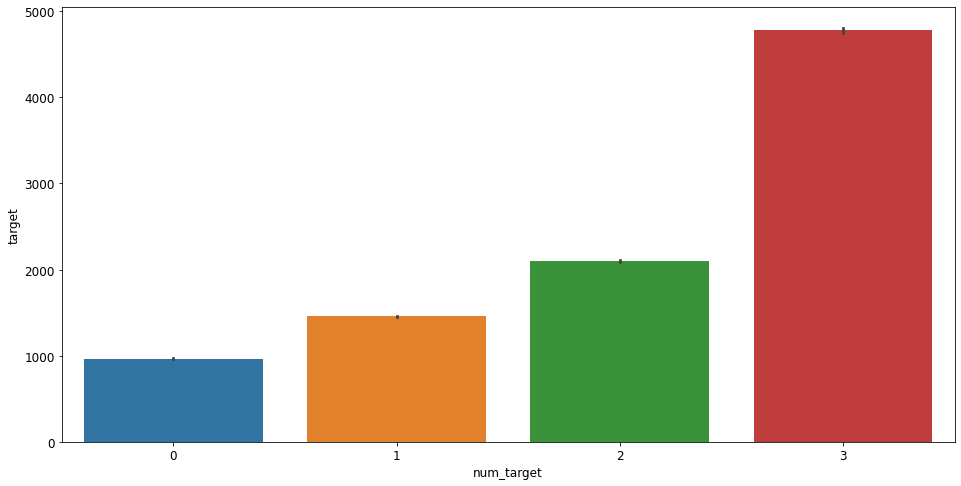

In [16]:
sns.barplot(data = train, x = 'num_target', y = 'target')

## date_time

In [17]:
# 월, 일, 시간 별로 나누는 함수 만들기
def date_time(df, columns = 'date_time'):
    df['month'] = df[columns].apply(lambda x: x[5:7])
    df['day'] = df[columns].apply(lambda x:x[8:10])
    df['hour'] = df[columns].apply(lambda x:x[11:])
    return df
# train데이터에 적용시켜주기
train = date_time(train)

In [18]:
# 평일과 공휴일 함수 만들기
def weekday(df, columns = 'date_time'):
    df[columns]=pd.to_datetime(df[columns])
    df['weekday'] = df[columns].apply(lambda x:x.weekday())
    df['weekday'] = df['weekday'].apply(lambda x:1 if x >4 else 0)
    return df
# 평일과 공휴일 함수 적용시켜주기
train=weekday(df = train)

### 월별 데이터 확인해보기

Text(0.5, 1.0, 'boxnplot - month of target')

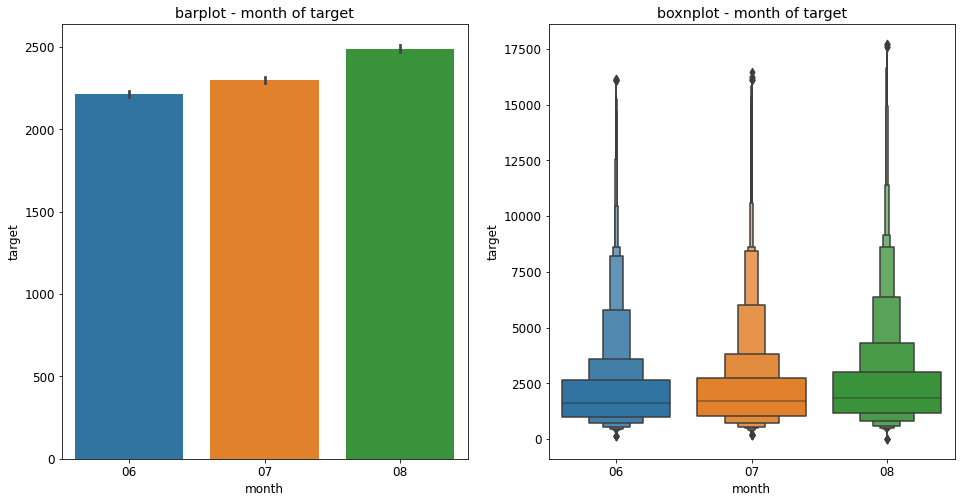

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'month', y = 'target', ax = ax[0])
ax[0].set_title('barplot - month of target')

sns.boxenplot(data = train, x= 'month', y = 'target', ax = ax[1])
ax[1].set_title('boxnplot - month of target')

- 시간이 지날수록 더 많은 전력량을 사용하는 것을 알 수 있다.
- 우리는 test값이 8월달의 데이터만 가지고 있기 때문에 어떻게 분석해줄지는 확인해 봐야겠다.

### 일별 확인해 보기

Text(0.5, 1.0, 'boxenplot - day of target')

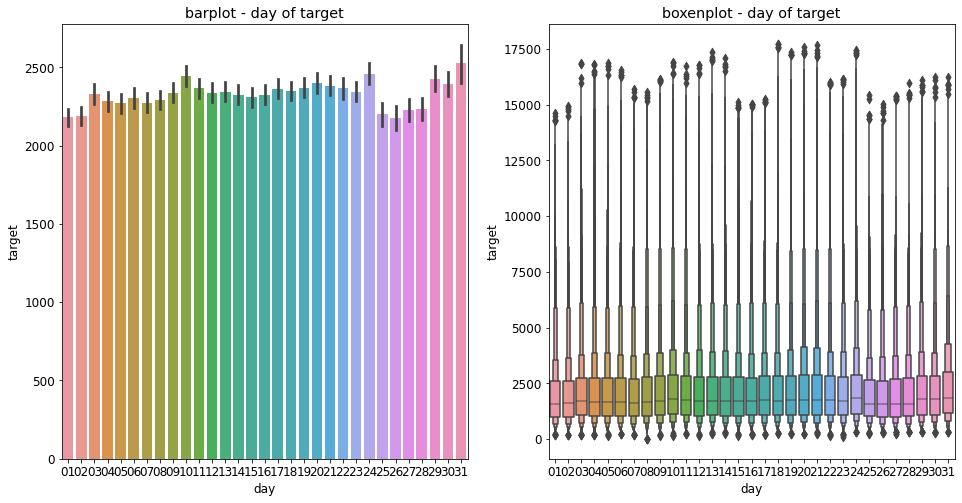

In [20]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'day', y = 'target', ax = ax[0])
ax[0].set_title('barplot - day of target')

sns.boxenplot(data = train, x = 'day', y = 'target', ax = ax[1])
ax[1].set_title('boxenplot - day of target')

- 일별로 큰 차이가 있다고 말 할수는 없을 것 같다

### 시간별 확인해 보기

Text(0.5, 1.0, 'boxenplot - hour of target')

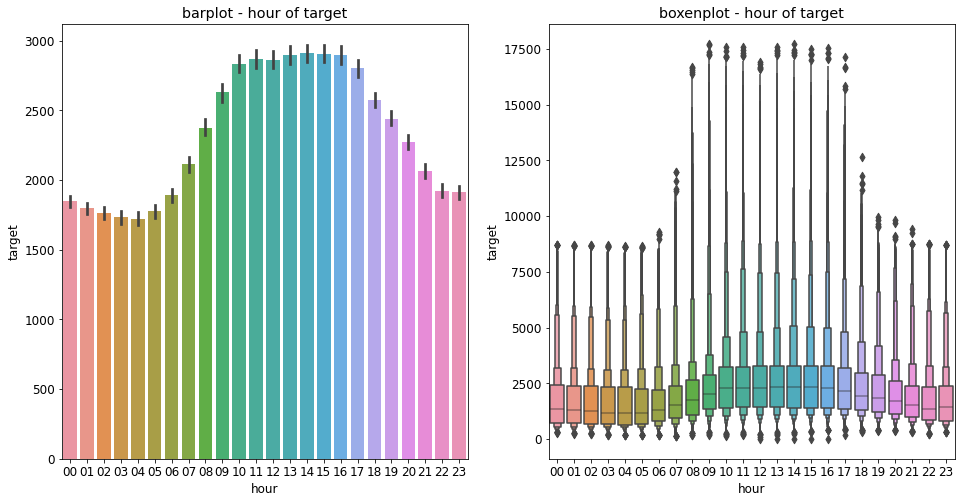

In [21]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'hour', y = 'target', ax = ax[0])
ax[0].set_title('barplot - hour of target')

sns.boxenplot(data = train, x = 'hour', y = 'target', ax = ax[1])
ax[1].set_title('boxenplot - hour of target')

- 시간별로 확실한 차이가 있다고 말할 수 있다.
- 사람들이 활동하는 시간에 전력소모량이 가장 많은 것을 알 수 있다.

### 평일과 주말로 비교해보기

Text(0.5, 1.0, 'boxenplot of weekday')

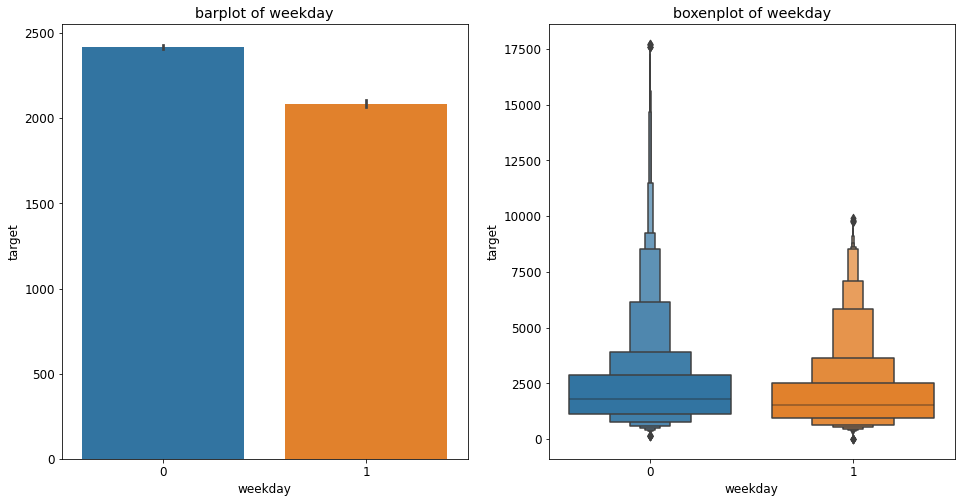

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'weekday', y = 'target', ax = ax[0])
ax[0].set_title('barplot of weekday')

sns.boxenplot(data = train, x = 'weekday', y  ='target', ax = ax[1])
ax[1].set_title('boxenplot of weekday')

- 평일에 많은 전력량을 소모하는 것으로 나타낸다.

Text(0.5, 1.0, 'weekday month target')

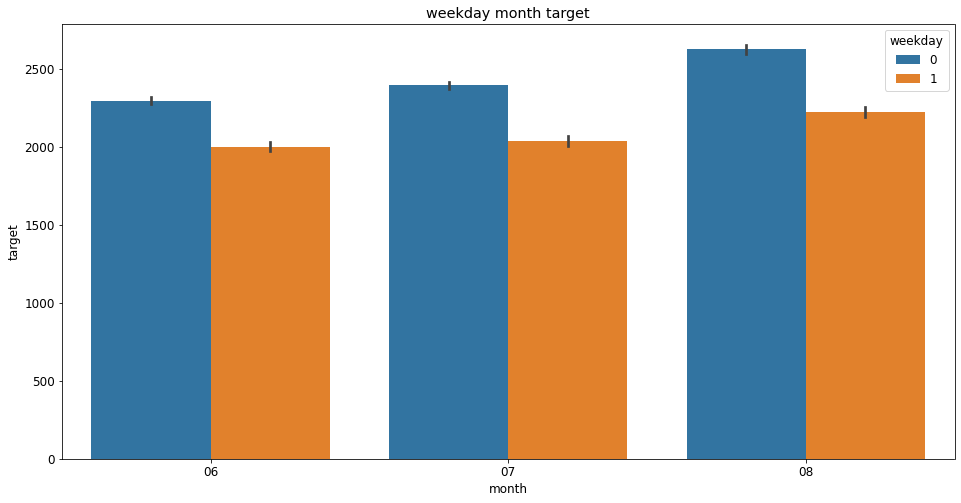

In [23]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'month', y = 'target', hue = 'weekday')
plt.title('weekday month target')

Text(0.5, 1.0, 'weekday day target')

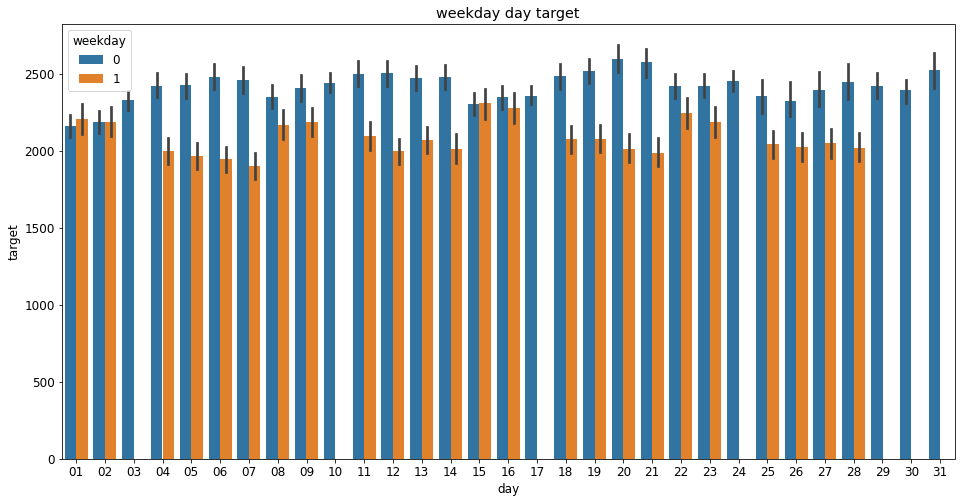

In [24]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'day', y = 'target', hue = 'weekday')
plt.title('weekday day target')

- 주말이 없는 날짜가 있기 때문에 표시가 안된 부분도 있다.

Text(0.5, 1.0, 'weekday hour target')

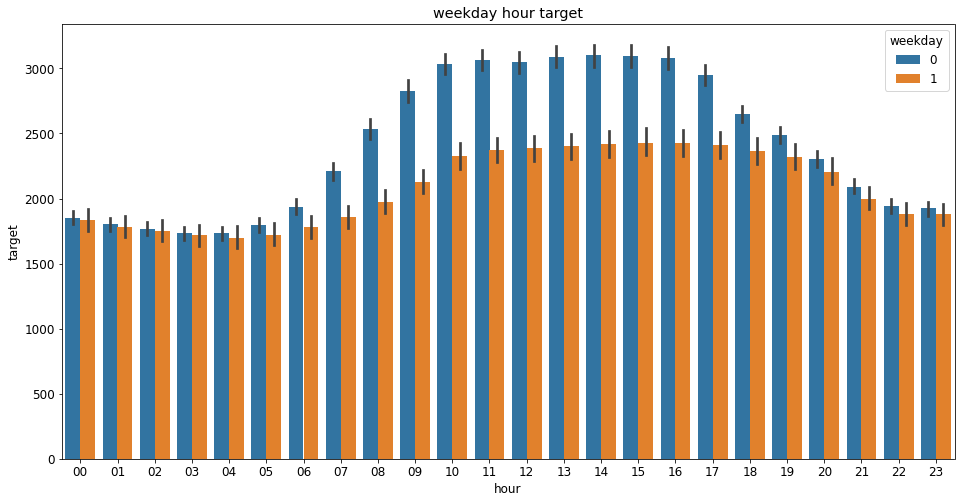

In [25]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'hour', y = 'target', hue = 'weekday')
plt.title('weekday hour target')

## 기온(Temperatures)

In [26]:
# min = 11.1, max = 36.3
train['Temperatures'].describe()

count    122400.000000
mean         24.251713
std           3.407902
min          11.100000
25%          21.800000
50%          24.200000
75%          26.500000
max          36.300000
Name: Temperatures, dtype: float64

<AxesSubplot:xlabel='Temperatures', ylabel='Density'>

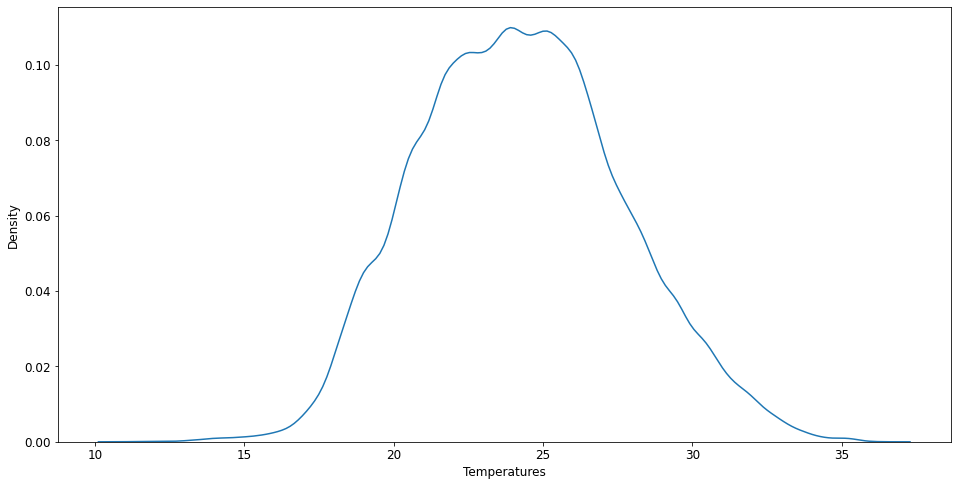

In [27]:
sns.kdeplot(data = train, x = 'Temperatures')

<AxesSubplot:xlabel='Temperatures', ylabel='target'>

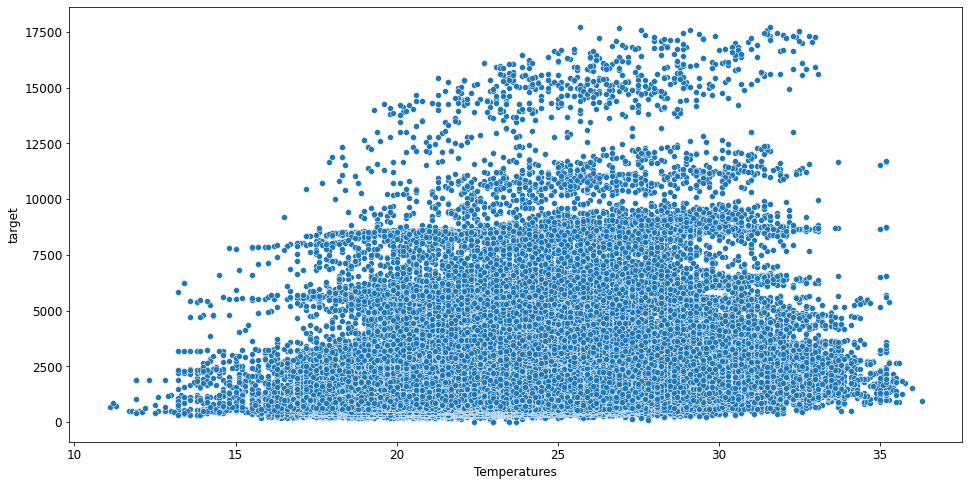

In [28]:
sns.scatterplot(data = train, x = 'Temperatures', y = 'target')

In [29]:
# 이 데이터는 온도에 따라 나눠주는 것이기 때문에 train의 데이터롤 그대로 가지고 와야한다.
train['Temperatures'].describe()

count    122400.000000
mean         24.251713
std           3.407902
min          11.100000
25%          21.800000
50%          24.200000
75%          26.500000
max          36.300000
Name: Temperatures, dtype: float64

In [30]:
train.loc[21.800000 >= train['Temperatures'], 'temperature_binning'] = 0
train.loc[(21.800000 < train['Temperatures']) & (train['Temperatures'] < 24.200000), 'temperature_binning'] = 1
train.loc[(24.200000 < train['Temperatures']) & (train['Temperatures'] < 26.500000), 'temperature_binning'] = 2
train.loc[(26.500000 < train['Temperatures']), 'temperature_binning'] = 3

test.loc[21.800000 >= test['Temperatures'], 'temperature_binning'] = 0
test.loc[(21.800000 < test['Temperatures']) & (test['Temperatures'] < 24.200000), 'temperature_binning'] = 1
test.loc[(24.200000 < test['Temperatures']) & (test['Temperatures'] < 26.500000), 'temperature_binning'] = 2
test.loc[(26.500000 < test['Temperatures']), 'temperature_binning'] = 3

Text(0.5, 1.0, 'temperature_binning boxenplot')

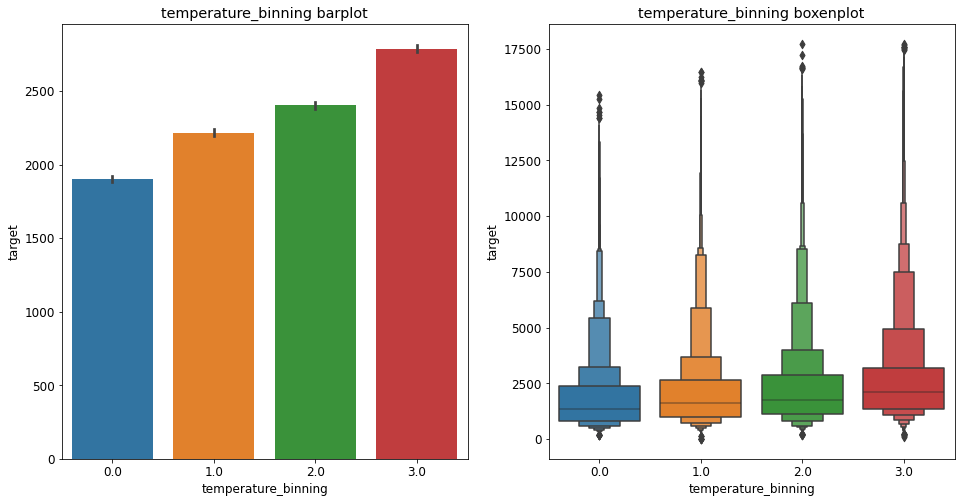

In [31]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'temperature_binning', y = 'target', ax = ax[0])
ax[0].set_title('temperature_binning barplot')

sns.boxenplot(data = train, x = 'temperature_binning', y = 'target', ax = ax[1])
ax[1].set_title('temperature_binning boxenplot')

- 이상치가 많은것으로 보이고 이상치는 사용 용도인 num에 따라서 다른 것 같다 우리는 num을 target 별로 군집화 하는게 어떨지 생각해 본다.
- 그게 안된다면 target을 포함한 변수들로 건물의 쓰이는 용도를 군집화 해주는 방법도 좋은 것 같다.

## 풍향(Wind speed)

In [32]:
train['Wind speed'].value_counts()

1.1     4241
1.6     3911
1.5     3831
1.2     3811
1.4     3746
        ... 
16.3       1
16.8       1
11.9       1
15.4       1
16.6       1
Name: Wind speed, Length: 155, dtype: int64

<AxesSubplot:xlabel='Wind speed', ylabel='target'>

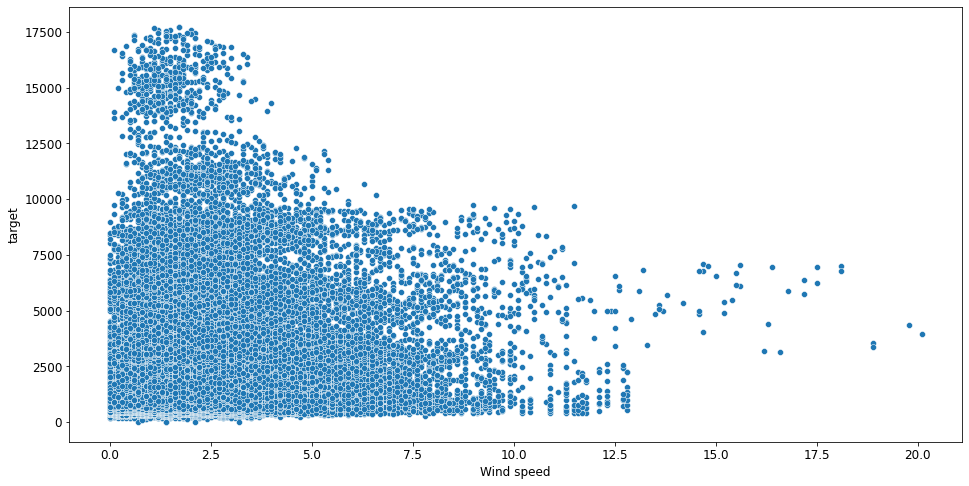

In [33]:
sns.scatterplot(data =train, x = 'Wind speed', y = 'target')

## 습도(Humidity)

In [34]:
train['Humidity'].value_counts

<bound method IndexOpsMixin.value_counts of 0         92.0
1         91.0
2         91.0
3         91.0
4         92.0
          ... 
122395    68.0
122396    71.0
122397    71.0
122398    74.0
122399    75.0
Name: Humidity, Length: 122400, dtype: float64>

<AxesSubplot:xlabel='Humidity', ylabel='target'>

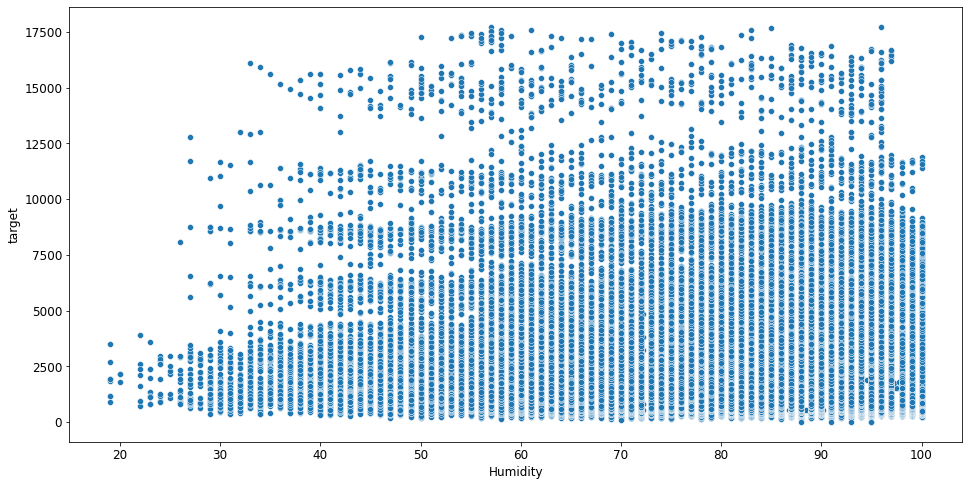

In [35]:
sns.scatterplot(data = train, x = 'Humidity', y = 'target')

## 강수량(Precipitation)

In [36]:
train['Precipitation'].value_counts()

0.0     103473
0.1       2508
0.2       1644
0.3       1171
0.5        830
         ...  
25.1         1
25.2         1
27.9         1
31.0         1
54.6         1
Name: Precipitation, Length: 296, dtype: int64

<AxesSubplot:xlabel='Precipitation', ylabel='target'>

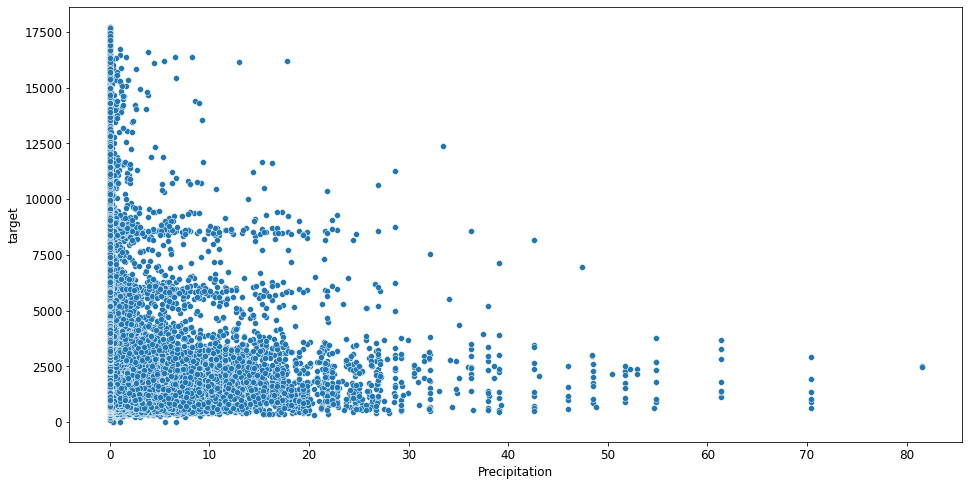

In [37]:
sns.scatterplot(data = train, x = 'Precipitation', y = 'target')

## 일조(sunshine)

In [38]:
train['sunshine'].value_counts()

0.0    85394
1.0    15137
0.1     3376
0.9     3361
0.8     2385
0.7     2306
0.2     2228
0.3     2216
0.6     2083
0.4     2024
0.5     1890
Name: sunshine, dtype: int64

<AxesSubplot:xlabel='sunshine', ylabel='target'>

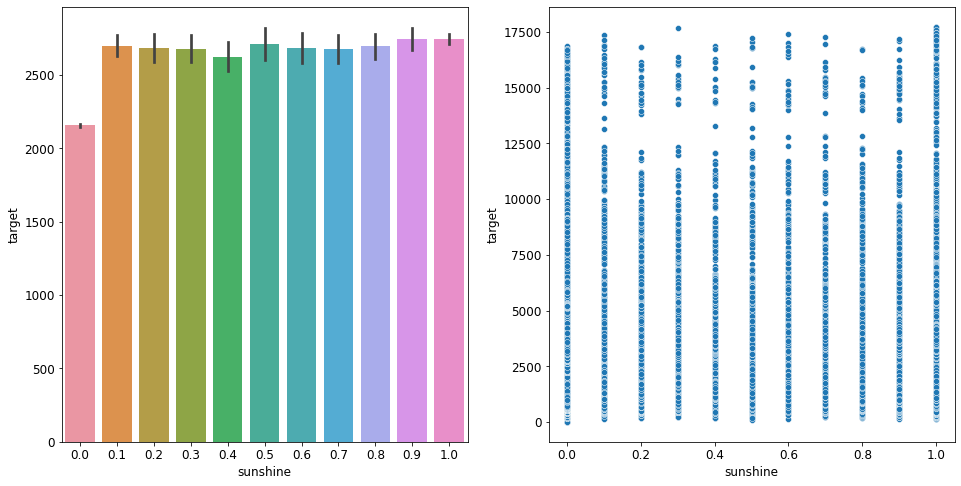

In [39]:
fig, ax = plt.subplots(ncols = 2)
sns.barplot(data = train, x = 'sunshine', y = 'target', ax = ax[0])

sns.scatterplot(data = train, x = 'sunshine', y = 'target', ax = ax[1])

## 비전기냉방설비운영

<AxesSubplot:xlabel='비전기냉방설비운영', ylabel='target'>

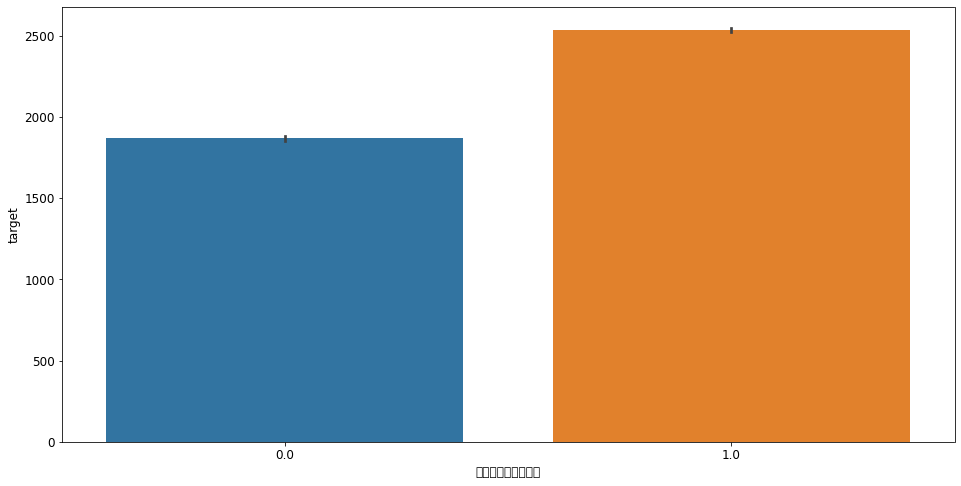

In [40]:
sns.barplot(data = train, x = '비전기냉방설비운영', y = 'target')

In [41]:
# 비전기냉방설비운영을 안하고있다가 하고 있는 곳을 확인했지만 그런 곳은 확인하지 못했다.
비전기냉방설비운영_0=list(train[train['비전기냉방설비운영'] == 0]['num'].unique())
비전기냉방설비운영_1=list(train[train['비전기냉방설비운영'] == 1]['num'].unique())

for i in 비전기냉방설비운영_0:
    비전기냉방설비운영_1.append(i)


len(비전기냉방설비운영_1) == len(train['num'].unique())

True

## 태양광보유

<AxesSubplot:xlabel='태양광보유', ylabel='target'>

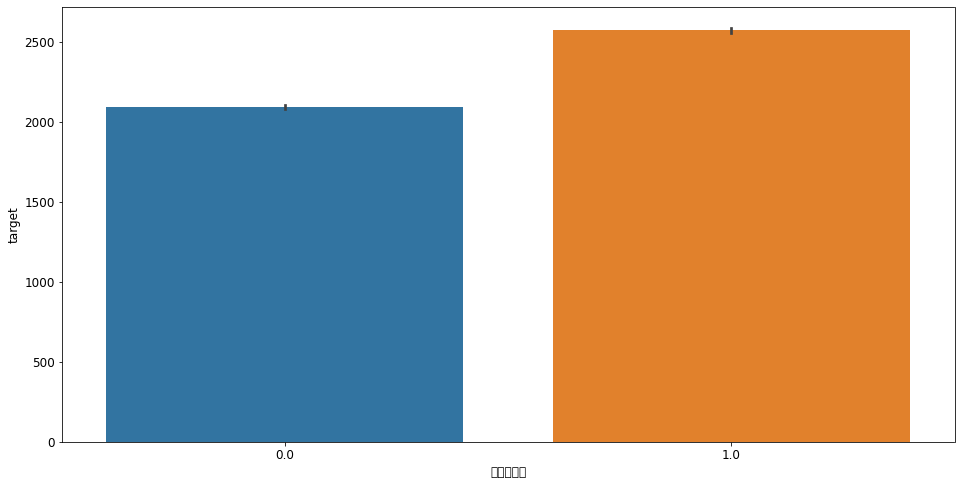

In [42]:
sns.barplot(data = train, x = '태양광보유', y = 'target')

In [43]:
# 태양광을 보유하지 않다가 보유한 건물이 있는지 확인해 보자.
태양광보유_0 = list(train[train['태양광보유'] == 0]['num'].unique())
태양광보유_1 = list(train[train['태양광보유'] == 1]['num'].unique())

for i in 태양광보유_0:
    태양광보유_1.append(i)
    
len(태양광보유_1) == len(train['num'].unique())

True

In [44]:
train.loc[(train['비전기냉방설비운영'] == 0) & (train['태양광보유'] == 0), 'new_column'] = 0
train.loc[(train['비전기냉방설비운영'] == 0) & (train['태양광보유'] == 1), 'new_column'] = 1
train.loc[(train['비전기냉방설비운영'] == 1) & (train['태양광보유'] == 0), 'new_column'] = 2
train.loc[(train['비전기냉방설비운영'] == 1) & (train['태양광보유'] == 1), 'new_column'] = 3

<AxesSubplot:xlabel='new_column', ylabel='target'>

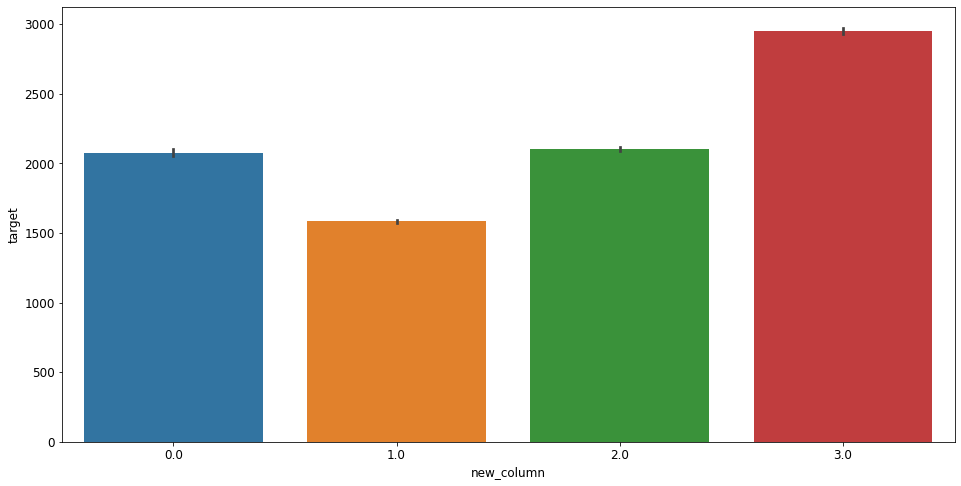

In [45]:
sns.barplot(data = train, x = 'new_column', y = 'target')

## 체감온도 구하기

In [46]:
train['Humidity']

0         92.0
1         91.0
2         91.0
3         91.0
4         92.0
          ... 
122395    68.0
122396    71.0
122397    71.0
122398    74.0
122399    75.0
Name: Humidity, Length: 122400, dtype: float64

In [47]:
train['Humidity'].min()

19.0

In [48]:
def winter_temperature(df = None):
    df['Wind speed km/h'] = df['Wind speed'].apply(lambda x: x*3.6)
    def tem(x):
        V = 'Wind speed km/h'
        T = 'Temperatures'
        temperature= 13.12 + (0.6215*x[T]) - 11.37*((x[V])**0.16) + (0.3965*(x[V] **0.16)*x[T])
        return temperature
    temperature = tem(df)
    df['겨울철 체감온도'] = temperature
    df.drop('Wind speed km/h', axis = 1, inplace = True)
    return df


def summer_temperature(df = None):
    
    def tem1(x):
        T = 'Temperatures'
        H = 'Humidity'
        temperature = x[T] + ((x[H] - 50)* 0.1)
        return temperature
    temperature = tem1(df)
    df['여름철 체감온도'] = temperature
    
    return df

In [49]:
# train= winter_temperature(train)
# test = winter_temperature(test)
                                      
train = summer_temperature(train)
test = summer_temperature(test)

습도 50%를 기준으로 10%가 올라가면 플러스 1도, 떨어지면 마이너스 1도로 치고 폭염주의보와 경보도 기온이 아니라 체감온도를 기준으로 발령하기로 했습니다 

Text(0.5, 1.0, 'summer temperature')

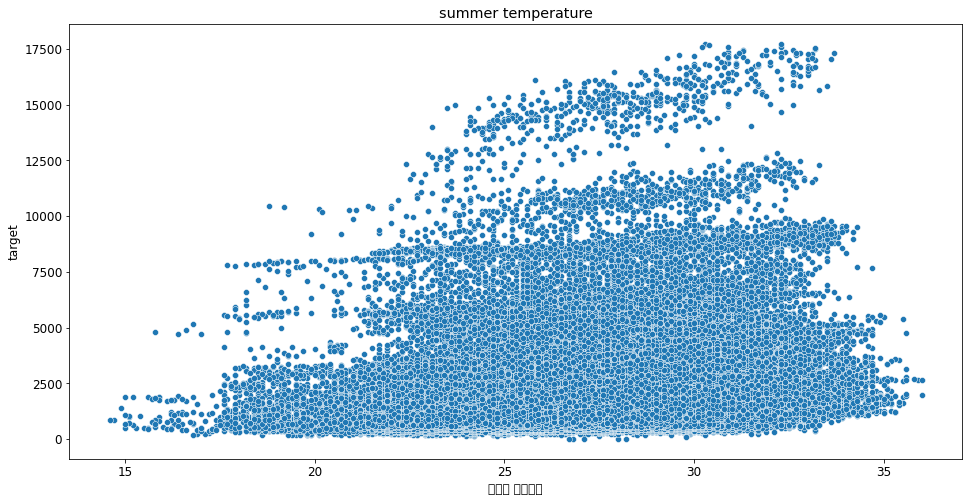

In [50]:
# fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
# sns.scatterplot(data = train, x = '겨울철 체감온도', y = 'target', ax = ax[0])
# ax[0].set_title('winter temperature')

sns.scatterplot(data = train, x = '여름철 체감온도', y = 'target')
plt.title('summer temperature')

## Test EDA

In [51]:
test = date_time(test)
test = weekday(df = test)

In [52]:
# 변수명이 너무 길기 때문에 변수명을 전부 바꿔준다.
test=test.rename(columns = {'기온(°C)':'Temperatures', '풍속(m/s)':'Wind speed',
                              '습도(%)':'Humidity',
                              '강수량(mm, 6시간)':'Precipitation','일조(hr, 3시간)':'sunshine'})

In [53]:
test.isnull().sum()

num                       0
date_time                 0
Temperatures              0
Wind speed                0
Humidity                  0
Precipitation             0
sunshine                  0
비전기냉방설비운영              7784
태양광보유                  8456
num_target                0
temperature_binning     125
여름철 체감온도                  0
month                     0
day                       0
hour                      0
weekday                   0
dtype: int64

In [54]:
print('3시간마다 데이터가 입력된다면 결측치의 값 :',len(test['Temperatures']) - (len(test['Temperatures'])/3))
print('6시간마다 데이터가 입력된다면 결측치의 값 :',len(test['Humidity']) - len(test['Humidity'])/ 6)
# 해당 결측치의 값과 같다.

3시간마다 데이터가 입력된다면 결측치의 값 : 6720.0
6시간마다 데이터가 입력된다면 결측치의 값 : 8400.0


- 기온, 풍속, 습도. 일조는 3시간마다 데이터가 입력되어 있다.
- 그러나 강수량은 6시간마다 데이터가 입력되어 있기 때문에 결측치도 다르다.
- 그래서 이 데이터를 어떻게 해주어야 할지 고민해 봐야겠다.

In [55]:
# Nan값으로 표시된 것은 전부 비전기냉방설비운영을 하지않는 사람인 것 같다.
test['비전기냉방설비운영'].value_counts()

1.0    2296
Name: 비전기냉방설비운영, dtype: int64

In [56]:
# Nan값으로 표시된 것은 전부 태양광보유를 하지 않은 사람이다.
test['태양광보유'].value_counts()

1.0    1624
Name: 태양광보유, dtype: int64

In [57]:
# 그러면 데이터를 같은 id에 1이 있다면 건물을 1을 넣어주고 아니라면 0을 넣어주자.
# 비전기냉방설비운영
for num in test['num'].unique():
    if len(test[test['num'] == num]['비전기냉방설비운영'].value_counts()) == 1:
        test.loc[test['num'] == num, '비전기냉방설비운영'] = 1
    else:
        test.loc[test['num'] == num, '비전기냉방설비운영'] = 0

In [58]:
# 그러면 데이터를 같은 id에 1이 있다면 건물을 1을 넣어주고 아니라면 0을 넣어주자.
# 태양광보유
for num in test['num'].unique():
    if len(test[test['num'] == num]['태양광보유'].value_counts()) == 1:
        test.loc[test['num'] == num, '태양광보유'] = 1
    else:
        test.loc[test['num'] == num, '태양광보유'] = 0

In [59]:
print(test['비전기냉방설비운영'].value_counts())
print(test['태양광보유'].value_counts())

1.0    6888
0.0    3192
Name: 비전기냉방설비운영, dtype: int64
0.0    5208
1.0    4872
Name: 태양광보유, dtype: int64


In [60]:
len(test)

10080

In [61]:
test.loc[(test['비전기냉방설비운영'] == 0) & (test['태양광보유'] == 0), 'new_column'] = 0
test.loc[(test['비전기냉방설비운영'] == 0) & (test['태양광보유'] == 1), 'new_column'] = 1
test.loc[(test['비전기냉방설비운영'] == 1) & (test['태양광보유'] == 0), 'new_column'] = 2
test.loc[(test['비전기냉방설비운영'] == 1) & (test['태양광보유'] == 1), 'new_column'] = 3

## 모델링

In [62]:
dummies = ['num','hour','weekday','new_column','temperature_binning','num_target'] # day는 제거해줘야 하는 변수고, month는 달이 오를수록 target변수가 오르므로 그냥 제거해주지 않고 써주도록 하자.
train_data=pd.get_dummies(data = train, columns = dummies)
test_data = pd.get_dummies(data = test, columns = dummies)

drop_columns = ['day','date_time','비전기냉방설비운영','태양광보유','Temperatures']
train_data = train_data.drop(drop_columns, axis = 1)
test_data = test_data.drop(drop_columns, axis = 1)

# month가 object로 들어가 있으므로 int형으로 바꿔준다.
train_data['month'] = train_data['month'].astype('int')
test_data['month'] = test_data['month'].astype('int')

In [63]:
test_data.interpolate()

,Wind speed,Humidity,Precipitation,sunshine,여름철 체감온도,month,num_1,num_2,num_3,num_4,...,new_column_1.0,new_column_2.0,new_column_3.0,temperature_binning_1.0,temperature_binning_2.0,temperature_binning_3.0,num_target_0,num_target_1,num_target_2,num_target_3
0,1.500000,74.000000,0.0,0.000000,30.200000,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1.366667,75.333333,0.0,0.000000,30.166667,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.233333,76.666667,0.0,0.000000,30.133333,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1.100000,78.000000,0.0,0.000000,30.100000,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1.166667,79.666667,0.0,0.000000,29.866667,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,3.566667,66.000000,0.0,0.533333,30.233333,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10076,3.833333,67.000000,0.0,0.266667,29.966667,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10077,4.100000,68.000000,0.0,0.000000,29.700000,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10078,4.100000,68.000000,0.0,0.000000,29.700000,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [64]:
train_data.drop('temperature_binning_0.0', axis = 1 ,inplace = True)

In [65]:
test_data

,Wind speed,Humidity,Precipitation,sunshine,여름철 체감온도,month,num_1,num_2,num_3,num_4,...,new_column_1.0,new_column_2.0,new_column_3.0,temperature_binning_1.0,temperature_binning_2.0,temperature_binning_3.0,num_target_0,num_target_1,num_target_2,num_target_3
0,1.500000,74.000000,0.0,0.000000,30.200000,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1.366667,75.333333,0.0,0.000000,30.166667,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.233333,76.666667,0.0,0.000000,30.133333,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1.100000,78.000000,0.0,0.000000,30.100000,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1.166667,79.666667,0.0,0.000000,29.866667,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,3.566667,66.000000,0.0,0.533333,30.233333,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10076,3.833333,67.000000,0.0,0.266667,29.966667,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10077,4.100000,68.000000,0.0,0.000000,29.700000,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10078,4.100000,68.000000,0.0,0.000000,29.700000,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [66]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('target', axis = 1), train_data['target'], test_size = 0.2, random_state = 42)


# # lightgbm
# lgb=LGBMRegressor()
# lgb.fit(train_data.drop('target', axis = 1), train_data['target'])
# y_pred=lgb.predict(test_data)


# catboost
catboost = CatBoostRegressor()
catboost.fit(train_data.drop('target', axis = 1), train_data['target'])
y_pred=catboost.predict(test_data)


# # xgboost
# xgb = XGBRegressor()
# xgb.fit(train_data.drop('target', axis = 1), train_data['target'])
# y_pred=xgb.predict(test_data)

Learning rate set to 0.091839
0:	learn: 1924.0322140	total: 177ms	remaining: 2m 56s
1:	learn: 1802.9441337	total: 192ms	remaining: 1m 35s
2:	learn: 1697.6548201	total: 211ms	remaining: 1m 10s
3:	learn: 1604.0035491	total: 236ms	remaining: 58.8s
4:	learn: 1519.5003933	total: 253ms	remaining: 50.3s
5:	learn: 1445.9214439	total: 266ms	remaining: 44.1s
6:	learn: 1379.3243656	total: 284ms	remaining: 40.2s
7:	learn: 1321.4813551	total: 299ms	remaining: 37s
8:	learn: 1270.5138925	total: 313ms	remaining: 34.4s
9:	learn: 1223.9981398	total: 328ms	remaining: 32.4s
10:	learn: 1185.8770067	total: 344ms	remaining: 30.9s
11:	learn: 1149.6460600	total: 360ms	remaining: 29.6s
12:	learn: 1118.0875242	total: 375ms	remaining: 28.5s
13:	learn: 1087.7567282	total: 395ms	remaining: 27.8s
14:	learn: 1061.9358638	total: 413ms	remaining: 27.1s
15:	learn: 1036.2240500	total: 446ms	remaining: 27.4s
16:	learn: 1014.1886374	total: 467ms	remaining: 27s
17:	learn: 994.7286499	total: 496ms	remaining: 27s
18:	learn: 9

154:	learn: 543.4594909	total: 3.11s	remaining: 17s
155:	learn: 542.3568941	total: 3.13s	remaining: 16.9s
156:	learn: 541.1269955	total: 3.15s	remaining: 16.9s
157:	learn: 540.1292830	total: 3.17s	remaining: 16.9s
158:	learn: 539.3843984	total: 3.19s	remaining: 16.9s
159:	learn: 538.4754821	total: 3.21s	remaining: 16.9s
160:	learn: 537.7068237	total: 3.23s	remaining: 16.8s
161:	learn: 536.7898990	total: 3.24s	remaining: 16.8s
162:	learn: 535.8975879	total: 3.26s	remaining: 16.8s
163:	learn: 535.1162396	total: 3.28s	remaining: 16.7s
164:	learn: 534.0093481	total: 3.31s	remaining: 16.7s
165:	learn: 532.9182569	total: 3.32s	remaining: 16.7s
166:	learn: 531.9954919	total: 3.34s	remaining: 16.7s
167:	learn: 530.9061742	total: 3.36s	remaining: 16.6s
168:	learn: 529.8176723	total: 3.37s	remaining: 16.6s
169:	learn: 529.0679675	total: 3.39s	remaining: 16.5s
170:	learn: 527.6030523	total: 3.4s	remaining: 16.5s
171:	learn: 526.6402047	total: 3.42s	remaining: 16.5s
172:	learn: 525.6610984	total: 

307:	learn: 442.5727763	total: 5.95s	remaining: 13.4s
308:	learn: 442.3960291	total: 5.97s	remaining: 13.3s
309:	learn: 441.8767398	total: 5.98s	remaining: 13.3s
310:	learn: 441.5151150	total: 6s	remaining: 13.3s
311:	learn: 441.0650626	total: 6.01s	remaining: 13.3s
312:	learn: 440.4356374	total: 6.04s	remaining: 13.2s
313:	learn: 439.9634867	total: 6.05s	remaining: 13.2s
314:	learn: 439.6225995	total: 6.07s	remaining: 13.2s
315:	learn: 438.9100956	total: 6.09s	remaining: 13.2s
316:	learn: 438.5801573	total: 6.1s	remaining: 13.2s
317:	learn: 438.0447135	total: 6.12s	remaining: 13.1s
318:	learn: 437.5764364	total: 6.13s	remaining: 13.1s
319:	learn: 437.1372355	total: 6.15s	remaining: 13.1s
320:	learn: 436.5226362	total: 6.17s	remaining: 13.1s
321:	learn: 436.0108818	total: 6.2s	remaining: 13.1s
322:	learn: 435.5774693	total: 6.21s	remaining: 13s
323:	learn: 435.0883269	total: 6.23s	remaining: 13s
324:	learn: 434.7995413	total: 6.25s	remaining: 13s
325:	learn: 434.3346802	total: 6.26s	re

461:	learn: 390.5141972	total: 8.86s	remaining: 10.3s
462:	learn: 390.2301304	total: 8.91s	remaining: 10.3s
463:	learn: 389.8354966	total: 8.96s	remaining: 10.3s
464:	learn: 389.5961278	total: 8.98s	remaining: 10.3s
465:	learn: 389.2545876	total: 9s	remaining: 10.3s
466:	learn: 388.9365665	total: 9.03s	remaining: 10.3s
467:	learn: 388.6947237	total: 9.05s	remaining: 10.3s
468:	learn: 388.4171733	total: 9.08s	remaining: 10.3s
469:	learn: 388.2115774	total: 9.1s	remaining: 10.3s
470:	learn: 388.0369660	total: 9.11s	remaining: 10.2s
471:	learn: 387.7874828	total: 9.14s	remaining: 10.2s
472:	learn: 387.5108970	total: 9.15s	remaining: 10.2s
473:	learn: 387.3158062	total: 9.18s	remaining: 10.2s
474:	learn: 387.1719178	total: 9.19s	remaining: 10.2s
475:	learn: 386.8958113	total: 9.21s	remaining: 10.1s
476:	learn: 386.6471573	total: 9.23s	remaining: 10.1s
477:	learn: 386.4328447	total: 9.26s	remaining: 10.1s
478:	learn: 386.2553669	total: 9.29s	remaining: 10.1s
479:	learn: 385.9689777	total: 9

615:	learn: 356.9842868	total: 12.1s	remaining: 7.51s
616:	learn: 356.7814170	total: 12.1s	remaining: 7.5s
617:	learn: 356.5921293	total: 12.1s	remaining: 7.47s
618:	learn: 356.4297111	total: 12.1s	remaining: 7.46s
619:	learn: 356.2009023	total: 12.1s	remaining: 7.44s
620:	learn: 355.9631131	total: 12.2s	remaining: 7.42s
621:	learn: 355.8383204	total: 12.2s	remaining: 7.4s
622:	learn: 355.6979857	total: 12.2s	remaining: 7.38s
623:	learn: 355.5457891	total: 12.2s	remaining: 7.36s
624:	learn: 355.4075031	total: 12.2s	remaining: 7.34s
625:	learn: 355.2538746	total: 12.3s	remaining: 7.32s
626:	learn: 355.0604724	total: 12.3s	remaining: 7.31s
627:	learn: 354.8851437	total: 12.3s	remaining: 7.29s
628:	learn: 354.6356533	total: 12.3s	remaining: 7.26s
629:	learn: 354.4334680	total: 12.3s	remaining: 7.24s
630:	learn: 354.2857450	total: 12.4s	remaining: 7.22s
631:	learn: 354.1490912	total: 12.4s	remaining: 7.2s
632:	learn: 354.0117930	total: 12.4s	remaining: 7.18s
633:	learn: 353.8203416	total: 

780:	learn: 331.9612649	total: 15.4s	remaining: 4.31s
781:	learn: 331.8414058	total: 15.4s	remaining: 4.29s
782:	learn: 331.7080837	total: 15.4s	remaining: 4.27s
783:	learn: 331.5810857	total: 15.4s	remaining: 4.25s
784:	learn: 331.4829424	total: 15.5s	remaining: 4.23s
785:	learn: 331.3632066	total: 15.5s	remaining: 4.21s
786:	learn: 331.2333906	total: 15.5s	remaining: 4.19s
787:	learn: 331.1224018	total: 15.5s	remaining: 4.17s
788:	learn: 330.9799511	total: 15.5s	remaining: 4.15s
789:	learn: 330.8737672	total: 15.5s	remaining: 4.13s
790:	learn: 330.7046985	total: 15.6s	remaining: 4.11s
791:	learn: 330.5385486	total: 15.6s	remaining: 4.09s
792:	learn: 330.4556545	total: 15.6s	remaining: 4.07s
793:	learn: 330.3036144	total: 15.6s	remaining: 4.05s
794:	learn: 330.1884790	total: 15.6s	remaining: 4.03s
795:	learn: 330.0793861	total: 15.6s	remaining: 4.01s
796:	learn: 329.9316701	total: 15.7s	remaining: 3.99s
797:	learn: 329.7581591	total: 15.7s	remaining: 3.97s
798:	learn: 329.6055352	tota

933:	learn: 313.5553055	total: 18.3s	remaining: 1.29s
934:	learn: 313.4007570	total: 18.3s	remaining: 1.27s
935:	learn: 313.2651368	total: 18.4s	remaining: 1.25s
936:	learn: 313.1610485	total: 18.4s	remaining: 1.24s
937:	learn: 313.0589198	total: 18.4s	remaining: 1.22s
938:	learn: 312.9396393	total: 18.4s	remaining: 1.2s
939:	learn: 312.8344953	total: 18.4s	remaining: 1.18s
940:	learn: 312.7308505	total: 18.5s	remaining: 1.16s
941:	learn: 312.6142272	total: 18.5s	remaining: 1.14s
942:	learn: 312.5166594	total: 18.5s	remaining: 1.12s
943:	learn: 312.4156507	total: 18.5s	remaining: 1.1s
944:	learn: 312.3113871	total: 18.5s	remaining: 1.08s
945:	learn: 312.2251689	total: 18.5s	remaining: 1.06s
946:	learn: 312.1492537	total: 18.6s	remaining: 1.04s
947:	learn: 312.0527413	total: 18.6s	remaining: 1.02s
948:	learn: 311.9535462	total: 18.6s	remaining: 1000ms
949:	learn: 311.8867880	total: 18.6s	remaining: 980ms
950:	learn: 311.7527878	total: 18.6s	remaining: 960ms
951:	learn: 311.6686952	total

In [67]:
y_pred

array([8439.88958611, 8398.43732168, 8380.72330755, ..., 3509.0081026 ,
       3392.59329237, 3286.00588728])

In [68]:
submission['answer'] = y_pred

In [69]:
submission.isnull().sum()

num_date_time    0
answer           0
dtype: int64

In [70]:
submission.to_csv('C:/Users/lg/전력사용량 예측 AI 경진대회/submission.csv',index= False)